# How can we control the increasing number of accidents in New York?

**Total points**: 46


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

## Introduction

**Business Context.** The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). 

The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. 
They would like specific information on certain parameters like borough, time of day, reason for accident, etc.

**Business Problem.** Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.

**Analytical Context.** You are given a CSV file (stored in the already created ```data``` folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is `;` instead of the default `,`. You will be performing the following tasks on the data:

1. Extract additional borough data stored in a JSON file
2. Read, transform, and prepare data for visualization
3. Construct and analyze visualizations of the data to identify patterns in the dataset
        
The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:

1. How have the number of accidents fluctuated over the past year and a half? Have they increased over that time?
2. For any particular day, during which hours are accidents most likely to occur?
3. Are there more accidents on weekdays than weekends?
4. What are the accidents' count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?
5. For each borough, during which hours are accidents most likely to occur?
6. What are the top 5 causes of accidents in the city? 
7. What types of vehicles are most involved in accidents per borough?
8. What types of vehicles are most involved in deaths?

**Note:** To solve this extended case, please read the function docstrings **very carefully**. They contain information that you will need! Also, please don't include `print()` statements inside your functions (they will most likely produce an error in the test cells). Finally, for the purposes of this case, do not worry about standardizing text variables - for example, treat `taxi` and `Taxi` as though they were different values.

## Fetching the relevant data

The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the ```data``` folder (this file was created using data from [Wikipedia](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City)).

Let's use the function ```json.load()``` to load the file ```borough_data.json``` as a dictionary:

In [2]:
with open('data/borough_data.json') as f:
    borough_data=json.load(f)
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

Similarly, let's use the `pandas` function ```read_csv()``` to load the file ```accidents.csv``` as a DataFrame. We will name this DataFrame ```df```. 

In [3]:
with open('data/accidents.csv') as f:
    df=pd.read_csv(f, delimiter=';')

## Overview of the data

Let's go through the columns present in the DataFrame:

In [4]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

We have the following columns:

1. **BOROUGH**: The borough in which the accident occurred
2. **COLLISION_ID**: A unique identifier for this collision
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Reasons for the accident
4. **CROSS STREET NAME**: Nearest cross street to the location of the accident
5. **DATE**: Date of the accident
6. **TIME**: Time of the accident
7. **LATITUDE**: Latitude of the accident
8. **LONGITUDE**: Longitude of the accident
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Injuries by category
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED**: Deaths by category
11. **ON STREET NAME**: Street where the accident occurred
13. **VEHICLE TYPE CODE (1, 2, 3, 4, 5)**: Types of vehicles involved in the accident
14. **ZIP CODE**: Zip code of the accident location

### Exercise 1 (2 points)

Since 2014, New York City has been implementing a road safety plan named [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). It aims to reduce the number of traffic deaths to *zero* by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:

<ul>
A. Automated pedestrian detection<br>
B. Road safety audits at high risk locations<br>
C. Expansion in the cycle track network<br>
D. Targeted education and awareness initiatives<br>
E. Creation of pedestrian refuge islands<br>
F. Launch Integrated Data-Driven Speed Reducer Program (speed humps & speed cushions)<br>
</ul>

Which of these initiatives could directly benefit from an analysis of the data provided? Select all that apply.

**Note:** In this notebook, whenever you are asked to write text, use the cell below the question cell to write your answer there. If you write in the same cell as the question, your answer will not be recorded.


A,B,E,F

## Answering the client's questions

Let's go ahead and answer each of the client's questions.

### Exercise 2

#### 2.1 (2 points)

Group the available accident data by month.

**Hint**: You may find the `pandas` functions [```pd.to_datetime()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) and [```dt.to_period()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html) useful.

In [5]:
def ex_2(df):
    """
    Group accidents by month
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `monthly_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    from datetime import datetime
    df["MONTH"] = pd.DatetimeIndex(df['DATE'])
    df["MONTH"] = df["MONTH"].dt.to_period("M")
    monthly_accidents = df.groupby(df["MONTH"]).size()
    
    
    return monthly_accidents


#### 2.2
##### 2.2.1 (1 point)

Generate a line plot of accidents over time.

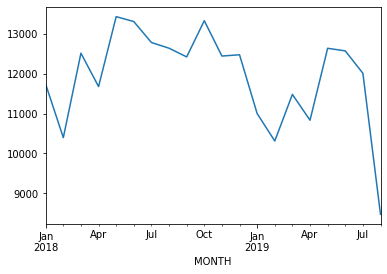

In [6]:
# YOUR CODE HERE
from datetime import datetime
df["MONTH"] = pd.DatetimeIndex(df['DATE'])
df["MONTH"] = df["MONTH"].dt.to_period("M")
monthly_accidents = df.groupby(df["MONTH"]).size().plot(kind = "line")



##### 2.2.2 (1 point)

Has the number of accidents increased over the past year and a half? Justify your answer with an interpretation of a plot. 


No. Accidents increased from Apr 2018 to May 2018 and remained steady until a decrease in Feb 2019. There was a decrease in Aug 2019.

### Exercise 3 (2 points)

From the plot above, which month(s) seem to have the least number of accidents? What do you think are the reasons behind this?


The month of February trended low in both 2018 and 2019. In New York this is a cold month so, possibly people aren't as active and staying home.

### Exercise 4

#### 4.1 (2 points)

Create a new column `HOUR` based on the data from the `TIME` column.

**Hint:** You may find the ```dt.hour``` accessor useful.

In [7]:
def ex_4(df):
    """
    Group accidents by hour of day
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `hourly_accidents`: The grouped Series

    """
    
    # YOUR CODE HERE
    df["HOUR"] = pd.DatetimeIndex(df['TIME'])
    
    hourly_accidents = df.groupby([df["HOUR"].dt.hour]).size()
    
    return hourly_accidents


#### 4.2
##### 4.2.1 (1 point)
 
Plot a bar graph of the distribution per hour throughout the day.

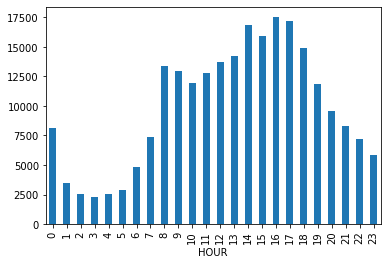

In [8]:
# YOUR CODE HERE
df["HOUR"] = pd.DatetimeIndex(df['TIME'])
    
hourly_accidents = df.groupby([df["HOUR"].dt.hour]).size().plot(kind = "bar")

##### 4.2.2 (1 point)
How does the number of accidents vary throughout a single day?



During early moring hours accidents are much lower whih is probably due to a less amount of cards beig on the road. It makes a dramatic increase in the 8:00 morning hour which is when work commutes begin. It remains steady and makes a sharp increase at the 2:00 hour which when people may be heading home or taking a late lunch. acidets remain higher during the evening commute and dwindle down after 8:00pm. 

### Exercise 5 (2 points)

In the above question we have aggregated the number of accidents per hour disregarding the date and place of occurrence. What criticism would you give to this approach?



By grouping by the hour the opportunity is missed to get granular and see if there are particular months or possibly times witin those months that accidents are higher. The opportunity is also missed to drill down into potential impacts such as holidays, parades, etc. that could be causing the accidents when only looking at the times.

### Exercise 6


#### 6.1 (2 points)

Calculate the number of accidents by day of the week.

**Hint:** You may find the ```dt.weekday``` accessor useful.

In [9]:
def ex_6(df):
    """
    Group accidents by day of the week
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `weekday_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    df["DAY"] = pd.DatetimeIndex(df['DATE'])
   
    df['DAY'] = df['DAY'].dt.dayofweek
    weekday_accidents = df.groupby(df["DAY"]).size()
   
  
    return weekday_accidents


#### 6.2
##### 6.2.1 (1 point)
Plot a bar graph based on the accidents count by day of the week.

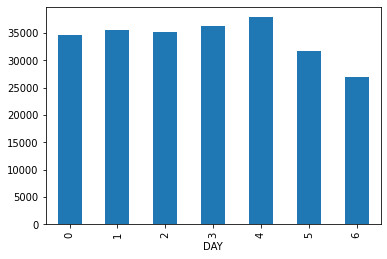

In [10]:
# YOUR CODE HERE
df["DAY"] = pd.DatetimeIndex(df['DATE'])
   
df['DAY'] = df['DAY'].dt.dayofweek
weekday_accidents = df.groupby(df["DAY"]).size().plot(kind = "bar")

##### 6.2.2 (1 point)

How does the number of accidents vary throughout a single week?


Accidents are even M-Th and there is a slight increase on Friday's. Over the weekend accidents drop betweem 5,000-10,000 acidents compared to weekday numbers.

### Exercise 7

#### 7.1 (2 points)

Calculate the total number of accidents for each borough.

In [11]:
def ex_7_1(df):
    """
    Group accidents by borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `boroughs`: The grouped Series
    """
    
    # YOUR CODE HERE
    boroughs = df.groupby(df["BOROUGH"]).size()
    
    return boroughs


#### 7.2
##### 7.2.1 (1 point)

Plot a bar graph of the previous data.

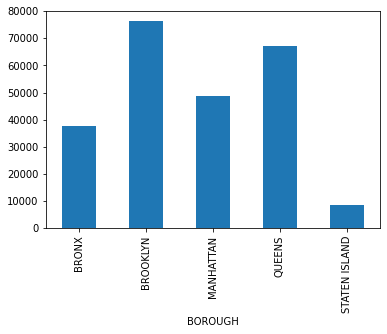

In [12]:
# YOUR CODE HERE
boroughs = df.groupby(df["BOROUGH"]).size().plot(kind='bar')

##### 7.2.2 (1 point)

What do you notice in the plot?


Brooklyn and Queens have the highest amount of accidents. Staten Island has the least amount of accidents which under 10,000.

#### 7.3 (hard | 3 points)

Calculate the number of accidents per square mile for each borough.

**Hint:** You will have to update the keys in the borough dictionary to match the names in the DataFrame.

In [32]:
def ex_7_3(df, borough_data):
    """
    Calculate accidents per sq mile for each borough
    
    Arguments:
    `borough_frame`: A pandas DataFrame with the count of accidents per borough
    `borough_data`: A python dictionary with population and area data for each borough
    
    
    Outputs:
    `borough_frame`: The same `borough_frame` DataFrame used as input, only with an
    additional column called `accidents_per_sq_mi` that results from dividing
    the number of accidents in each borough by its area. Please call this new column
    exactly `accidents_per_sq_mi` - otherwise the test cells will throw an error.
    """
    
    boroughs = ex_7_1(df)
    borough_frame = pd.DataFrame(boroughs)
    
    # YOUR CODE HERE
    temp = 'area'
    borough_data_2 = [val[temp] for key, val in borough_data.items() if temp in val]
    borough_frame['accidents_per_sq_mi'] = borough_frame[0]/borough_data_2 
      
    
    return borough_frame # This must be a DataFrame, NOT a Series



,0,accidents_per_sq_mi
BOROUGH,,
BRONX,37709,895.700713
BROOKLYN,76253,1076.715617
MANHATTAN,48749,2135.304424
QUEENS,67120,618.446512
STATEN ISLAND,8691,148.894980


#### 7.4
##### 7.4.1 (1 point)

Plot a bar graph of the accidents per square mile per borough with the data you just calculated. 

<AxesSubplot: xlabel='BOROUGH'>

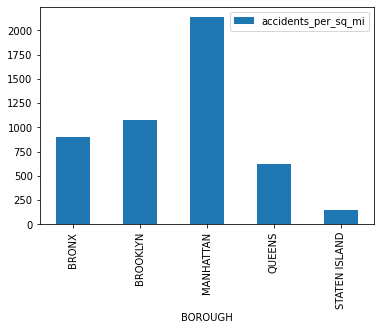

In [37]:
# YOUR CODE HERE
ex_7_3 = ex_7_3(df, borough_data).reset_index()
ex_7_3.plot(kind='bar', x = 'BOROUGH', y = 'accidents_per_sq_mi')

##### 7.4.2 (1 point)

What can you conclude?


Although Manhattan doesn't have the highest amount of accidents overall, the city does experience the highest amount of accidents per square mile. Staten Island has the lowest amount of accidents and lowest per square mile. 

### Exercise 8

#### 8.1 (2 points)

Create a Series of the number of accidents per hour and borough.

In [15]:
def ex_8_1(df):
    """
    Calculate accidents per hour for each borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    
    Outputs:
    `bor_hour`: A Series. This should be the result of doing groupby by borough
    and hour.
    """
    
    # YOUR CODE HERE
    df["HOUR"] = pd.DatetimeIndex(df['TIME'])
    df['HOUR']=df["HOUR"].dt.hour
    bor_hour = df.groupby(["BOROUGH",'HOUR']).size()
    
    return bor_hour


#### 8.2
##### 8.2.1 (2 points)

Plot a bar graph for each borough showing the number of accidents for each hour of the day. 

**Hint:** You can use ```sns.FacetGrid``` to create a grid of plots with the hourly data of each borough.

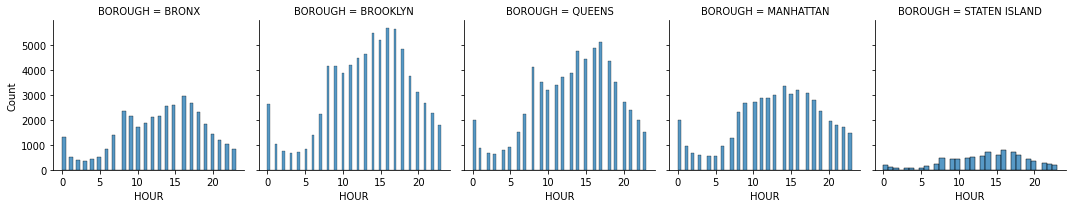

In [38]:
# YOUR CODE HERE
df["HOUR"] = pd.DatetimeIndex(df['TIME'])
df['HOUR']=df["HOUR"].dt.hour
bor_hour = df.groupby(["BOROUGH",'HOUR']).size()
b = sns.FacetGrid(df, col ="BOROUGH")
b.map_dataframe(sns.histplot, x="HOUR")

##### 8.2.2 (1 point)

Which hours have the most accidents for each borough?


The Bronx has the most accidents in the 4:00pm HR. Brooklyn has the most accidents between the 4:00pm-5:00pm HRs. Queens has the most accidents in the 5:00pm HR. Manhattan has the most accidents in the 2:00pm HR. Staten Island has the most accidents in the 4:00pm HR.

### Exercise 9 (hard | 3 points)

Using `contrib_df`, find which 6 factors cause the most accidents. It is important that you avoid double counting the contributing factors of a single accident.

**Hint:** You can use the [**`pd.melt()`**](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function to take a subset of `df` and convert it from [wide format to narrow format](https://en.wikipedia.org/wiki/Wide_and_narrow_data).

In [17]:
def ex_9(df):
    """
    Finds which 6 factors cause the most accidents, without 
    double counting the contributing factors of a single accident.
    
    Arguments:
    `contrib_df`: A pandas DataFrame.
    
    Outputs:
    `factors_most_acc`: A pandas DataFrame. It has only 6 elements, which are,
    sorted in descending order, the contributing factors with the most accidents.
    The column with the actual numbers is named `index`.    
    """
    
    # YOUR CODE HERE
   
    contrib_df = df[['CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']].copy()
    contrib_df = pd.melt(contrib_df.reset_index(), id_vars = 'index', value_vars = contrib_df).dropna()
    contrib_df = contrib_df.drop_duplicates(subset = ['index', 'value'])
    factors_most_acc = contrib_df.groupby('value').size().sort_values("index", ascending = False).head(6)
    factors_most_acc = factors_most_acc.to_frame(name = 'index')
    
    return factors_most_acc


### Exercise 10 (hard | 3 points)

Which 10 vehicle type-borough pairs are most involved in accidents? Avoid double counting the types of vehicles involved in a single accident. You can apply a similar approach to the one used in the previous exercise using `pd.melt()`.

**Hint:** You may want to include `BOROUGH` as one of your `id_vars` (the other being `index`) in `pd.melt()`. Including `BOROUGH` in your final `.groupby()` is also a good idea.

In [18]:
def ex_10(df):
    """
    Finds the 10 borough:vehicle type pairs with more accidents, without 
    double counting the vehicle types of a single accident.
    
    Arguments:
    `df`: A pandas DataFrame.
    
    Outputs:
    `vehi_most_acc`: A pandas DataFrame. It has only 10 elements, which are,
    sorted in descending order, the borough-vehicle pairs with the most accidents.
    The column with the actual numbers is named `index`
    """

    vehi_cols = ['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']
    
    # YOUR CODE HERE
    df = pd.melt(df.reset_index(), id_vars = ['BOROUGH','index'], value_vars = vehi_cols).dropna()
    df = df.drop_duplicates(subset=['index','value'])
    vehi_most_acc = df.groupby(['BOROUGH','value']).count().reset_index().sort_values('index', ascending = False).head(10)
    
    
    
    
    return vehi_most_acc


### Exercise 11 (2 points)

In a 2018 [interview](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) with The New York Times, New York's mayor de Blasio stated that "*Vision Zero is clearly working*". That year, the number of deaths in traffic accidents in NYC dropped to a historically low 202. Yet, as reported by [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio-1-30707464/), the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclists injured has not seen any improvement.

Which of the following BEST describes how you would use the provided data to understand what went wrong in the first quarter of 2019? Please explain the reasons for your choice.

<ul>
A. Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information.<br>
B. Create a pair of heat maps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.<br>
C. The provided data is insufficient to improve our understanding of the situation.<br>
D. None of the above. (If you choose this, please elaborate on what you would do instead.)<br>
</ul>



D. I would do a version similar to choice A. I do think it will be beneficial to review the accidents of Q1 2019 to get an understanding of what particular types of accidents as well as where to see what needs to be done to reduce. I also think it will be beneficial to compare that data of type and where the incidents are happening to 2018 in order to see if there was a sudden increase or if these areas are a consistent issue.

### Exercise 12

#### 12.1 (hard | 3 points)

Calculate the number of deaths caused by each type of vehicle.

**Hint 1:** As an example of how to compute vehicle involvement in deaths, suppose two people died in an accident where 5 vehicles were involved, and 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then we would add two deaths to both the PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.)

**Hint 2:** You will need to use `pd.melt()` and proceed as in the previous exercises to avoid double-counting the types of vehicles (i.e. you should remove duplicate "accident ID - vehicle type" pairs).

In [19]:
def ex_12_1(df):
    """
    Calculate total killed per vehicle type and plot the result
    as a bar graph
    
    Arguments:
    `df`: A pandas DataFrame.    
    
    Outputs:
    `result`: A pandas DataFrame. Its index should be the vehicle type. Its only
    column should be `TOTAL KILLED`
    """
    
    # YOUR CODE HERE
    vehi_cols = ['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']
    df ['TOTAL KILLED'] = df['NUMBER OF PEDESTRIANS KILLED']+df['NUMBER OF CYCLIST KILLED']+df['NUMBER OF MOTORIST KILLED']
    result = pd.melt(df.reset_index(), id_vars = ['index','TOTAL KILLED'], value_vars = vehi_cols)
    result = result.drop(columns = ['variable', 'index'])
    result = result.dropna(subset = ['value'])
    result = result.groupby(['value']).sum().reset_index().sort_values('TOTAL KILLED', ascending = False)
    result = result.set_index('value')
    
    return result


#### 12.2
##### 12.2.1 (1 point)

Plot a bar chart for the top 5 vehicles.

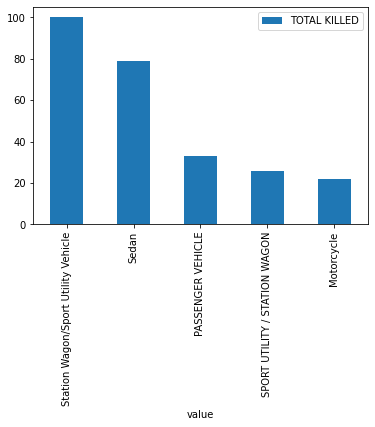

In [20]:
# YOUR CODE HERE

result = ex_12_1(df).head(5).plot(kind='bar')


##### 12.2.2 (2 points)

Which vehicles are most often involved in deaths, and by how much more than the others?


Station wagons/SUVs and sedans are most invlolved in deaths. Station wagons/SUVs are invloved over 4 times more than motorcycles, over 3 times more than SUV/Station wagons, and 3 times more than passenger vehicles. Sedans are invloved over 3 times more than motorcycles, 3 times more than SUV/Station wagons, and over 2 times more than passenger vehicles.

## Testing cells

In [21]:
# Ex. 2.1
assert type(ex_2(df)) == type(pd.Series([9,1,2])), "Ex. 2.1 - Your output isn't a pandas Series. If you use .groupby() and an aggregation function, the output is a Series by default."
assert ex_2(df).loc["2018-10"] == 13336, "Ex. 2.1 - Wrong output! Try using the .size() aggregation function with your .groupby()."
print("Exercise 2.1 looks correct!")

Exercise 2.1 looks correct!


In [22]:
# Ex 4.1
assert type(ex_4(df)) == type(pd.Series([9,1,2])), "Ex. 4.1 - Your output isn't a pandas Series. If you use .groupby() and an aggregation function, the output is a Series by default."
assert ex_4(df).loc[13] == 14224, "Ex. 4.1 - Wrong output! Try using the .size() aggregation function with your .groupby()."
print("Exercise 4.1 looks correct!")

Exercise 4.1 looks correct!


In [23]:
# Ex. 6.1
assert type(ex_6(df)) == type(pd.Series([9,1,2])), "Ex. 6.1 - Your output isn't a pandas Series. If you use .groupby() and an aggregation function, the output is a Series by default."
assert max(ex_6(df)) == 37886, "Ex. 6.1 - Your results don't match ours! Remember that you can use the .size() aggregation function to count the number of elements in a groupby group."
print("Exercise 6.1 looks correct!")

Exercise 6.1 looks correct!


In [24]:
# Ex. 7.1
assert type(ex_7_1(df)) == type(pd.Series([9,1,2])), "Ex. 7.1 - Your output isn't a pandas Series. If you use .groupby() and an aggregation function, the output is a Series by default."
assert max(ex_7_1(df)) == 76253, "Ex. 7.1 - Your results don't match ours! Remember that you can use the .size() aggregation function to count the number of elements in a groupby group."
print("Exercise 7.1 looks correct!")

Exercise 7.1 looks correct!


In [25]:
# Ex. 7.3
with open('data/borough_data.json') as f:
    borough_data=json.load(f)
borough_data
e73 = ex_7_3(df, borough_data)
assert "accidents_per_sq_mi" in e73.columns, "Ex. 7.3 - You didn't create an 'accidents_per_sq_mi' in your DataFrame!"
assert round(min(e73["accidents_per_sq_mi"])) == 149, "Ex. 7.3 - Your output doesn't match ours! Remember that you need to divide the number of accidents in each of the five boroughs by the respective areas in square miles."
print("Exercise 7.3 looks correct!")

Exercise 7.3 looks correct!


In [26]:
# Ex. 8.1
assert type(ex_8_1(df)) == type(pd.Series([9,1,2])), "Ex. 8.1 - Your output isn't a pandas Series. If you use .groupby() and an aggregation function, the output is a Series by default."
assert ex_8_1(df).max() == 5701, "Ex. 8.1 - Your numbers don't match ours. If you haven't already, you can try using .size() as your aggregation function."
print("Exercise 8.1 looks correct!")

Exercise 8.1 looks correct!


In [27]:
# Ex. 9
assert type(ex_9(df)) == type(pd.Series([9,1,2]).to_frame()), "Ex. 9 - Your output isn't a pandas DataFrame. If you use .groupby() and an aggregation function, the output is a Series by default."
assert len(ex_9(df)) == 6, "Ex. 9 - Your output doesn't have six elements. Did you forget to use .head(6)?"
assert int(ex_9(df)["index"].sum()) == 316248, "Ex. 9 - Your numbers don't match ours. Are you sure you sorted your Series in descending order? If you haven't already, you can try using .count() as your aggregation function."
print("Exercise 9 looks correct!")

Exercise 9 looks correct!


In [28]:
# Ex. 10
assert type(ex_10(df)) == type(pd.Series([9,1,2]).to_frame()), "Ex. 10 - Your output isn't a pandas DataFrame. If you use .groupby() and an aggregation function, the output is a Series by default."
assert len(ex_10(df)["index"]) == 10, "Ex. 10 - Your output doesn't have 10 elements. Did you forget to use .head(10)?"
assert ex_10(df)["index"].sum() == 229882, "Ex. 10 - Your numbers don't match ours. Are you sure you sorted your Series in descending order? If you haven't already, you can try using .count() as your aggregation function."
print("Exercise 10 looks correct!")

Exercise 10 looks correct!


In [29]:
# Ex. 12.1
e12 = ex_12_1(df)
assert type(e12) == type(pd.Series([9,1,2]).to_frame()), "Ex. 12.1 - Your output isn't a pandas DataFrame. If you use .groupby() and an aggregation function, the output is a Series by default."
assert int(e12.loc["Bike"]) == 19, "Ex. 12.1 - Your output doesn't match ours! Remember that you need to remove the duplicate pairs and use the .sum() aggregation function in your groupby."
print("Exercise 12.1 looks correct!")

Exercise 12.1 looks correct!


## Attribution

"Vehicle Collisions in NYC 2015-Present", New York Police Department, [NYC Open Data terms of use](https://opendata.cityofnewyork.us/overview/#termsofuse), https://www.kaggle.com/nypd/vehicle-collisions

"Boroughs of New York City", Creative Commons Attribution-ShareAlike License, https://en.wikipedia.org/wiki/Boroughs_of_New_York_City